# Predict Health Outcomes of Horses

Playground Series - Season 3, Episode 22

(https://www.kaggle.com/competitions/playground-series-s3e22)

![image](./data/header.png)

__Overview__
Welcome to the 2023 edition of Kaggle's Playground Series!
Thank you to everyone who participated in and contributed to Season 3 Playground Series so far!

With the same goal to give the Kaggle community a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science, we will continue launching the Tabular Tuesday in September every Tuesday 00:00 UTC, with each competition running for 3 weeks. Again, these will be fairly light-weight datasets that are synthetically generated from real-world data, and will provide an opportunity to quickly iterate through various model and feature engineering ideas, create visualizations, etc.

__Your Goal:__ Given various medical indicators, predict the health outcomes of horses.

__Dataset Description__
The dataset for this competition (both train and test) was generated from a deep learning model trained on a portion of the Horse Survival Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

__Files__

- train.csv - the training dataset; outcome is the (categorical) target
- test.csv - the test dataset; your objective is to predict outcome
- sample_submission.csv - a sample submission file in the correct format

__Models__
- K-Nearest Neighboor Model 
- Gaussian Naive Bayes Model 
- Logistic Regressor 
- Support Vector Classification Model 
- Decision Tree Model 
- Random Forest Model 
- Linear Discriminant Analysis Model 
- Gradient Boosting Classifier Model 
- Neural Network CLassifier Model 
- X Gradient Boost Classifier
- Cat Boosting Classifier

In [81]:
%pip install -r requirements.txt --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^
Note: you may need to restart the kernel to use updated packages.


In [102]:
# Import all necessary libraries

import os
import time
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import datetime as dt
import warnings as wn
import matplotlib.pyplot as plt

from catboost import Pool
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

In [103]:
# Ignore all warnings
wn.filterwarnings('ignore')

In [104]:
# Set all variables paths 

_plots = './plots/'
_tested = './tested/'
_test = './data/test.csv'
_train = './data/train.csv'
_info = './model/model.docx'
_model = './model/model.pkl'
_submission = './data/sample_submission.csv'

In [105]:
# Read training dataframe
train = pd.read_csv(_train, index_col='id')

In [106]:
# Display the first n rows of training
train.head(n=10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,less_3_sec,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,more_3_sec,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,less_3_sec,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived


In [107]:
# Describe the data
train.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [108]:
# Display more info about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1235 non-null   object 
 7   peripheral_pulse       1235 non-null   object 
 8   mucous_membrane        1235 non-null   object 
 9   capillary_refill_time  1235 non-null   object 
 10  pain                   1235 non-null   object 
 11  peristalsis            1235 non-null   object 
 12  abdominal_distention   1235 non-null   object 
 13  nasogastric_tube       1235 non-null   object 
 14  nasogastric_reflux     1235 non-null   object 
 15  naso

In [89]:
# Verify if there are null values
train.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [90]:
# Check for dublicates
print(train.duplicated().sum())
train.drop_duplicates()

0


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived


In [109]:
# Set the columns names
names = train['outcome'].unique()
names

array(['died', 'euthanized', 'lived'], dtype=object)

In [92]:
# Check for outliers

def remove_outliers(df):

    outliers_columns = []
    total_rows = len(df)
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = outliers.sum()
        outlier_percentage = (outlier_count / total_rows) * 100
        
        if outlier_percentage >= 20:
            outliers_columns.append(column)
            print(f"Outliers detected in column '{column}': {outlier_percentage:.2f}% of total rows.")
            
            df = df[~outliers]
            print(f"Removed {outlier_count} outliers from column '{column}'.")
    
    if not outliers_columns:
        print("No columns with outliers exceeding 20% detected.")

    return df
    
train = remove_outliers(train)

Outliers detected in column 'total_protein': 24.29% of total rows.
Removed 300 outliers from column 'total_protein'.
Outliers detected in column 'lesion_1': 21.94% of total rows.
Removed 271 outliers from column 'lesion_1'.


In [110]:
# Encode the string training data

for column in train.columns[:]:
    if train[column].dtype == 'O':
        encoder = LabelEncoder()
        train[column] = encoder.fit_transform(train[column])
        mapping_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [111]:
# Set the dataframes from training data
response = train.pop('outcome')
train.insert(len(train.columns), 'outcome', response)
y_data = pd.DataFrame(train['outcome'])
X_data = pd.DataFrame(train.iloc[:,:-1])

In [95]:
# Reshape for unbalanced data
smoteenn = SMOTEENN()
X_data, y_data = smoteenn.fit_resample(X_data, y_data)

In [112]:
# Split The Training And Testing Data

rows = train.shape[0]
cols = train.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [113]:
# Fill the null values with zero

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [114]:
# Newer input and output data
train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,530001,38.1,132.0,24.0,2,4,3,3,...,57.0,8.5,3,3.4,1,2209,0,0,0,0
1,1,0,533836,37.5,88.0,12.0,2,3,5,3,...,33.0,64.0,3,2.0,1,2208,0,0,0,1
2,1,0,529812,38.3,120.0,28.0,2,4,6,2,...,37.0,6.4,3,3.4,1,5124,0,0,0,2
3,1,0,5262541,37.1,72.0,30.0,1,4,6,3,...,53.0,7.0,2,3.9,1,2208,0,0,1,2
4,0,0,5299629,38.0,52.0,48.0,3,3,4,2,...,47.0,7.3,2,2.6,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,535246,38.5,129.0,48.0,2,4,6,3,...,57.0,66.0,3,2.0,1,2206,0,0,0,2
1231,1,0,528570,37.5,60.0,50.0,2,4,5,2,...,35.0,6.4,3,3.6,1,2209,0,0,1,0
1232,1,1,529685,37.5,84.0,40.0,3,4,4,2,...,40.0,5.9,2,7.0,1,400,0,0,1,2


# Plotting Training Data

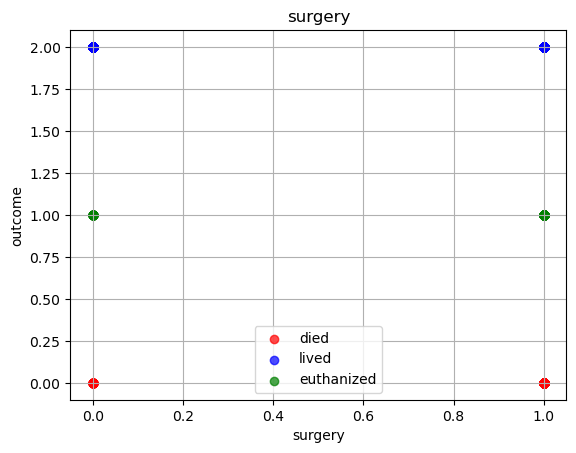

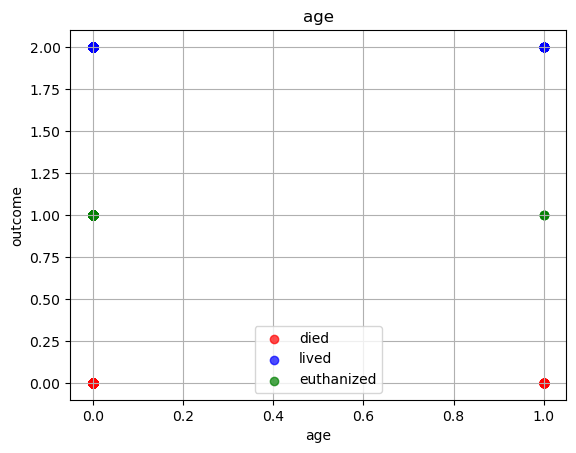

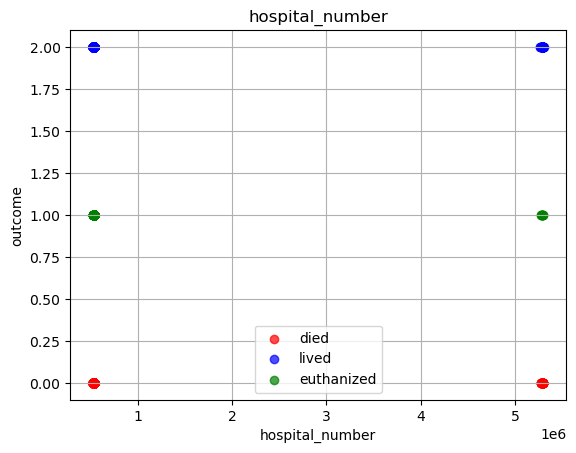

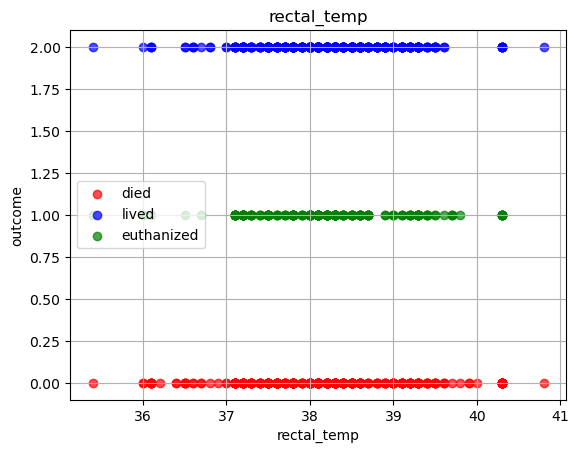

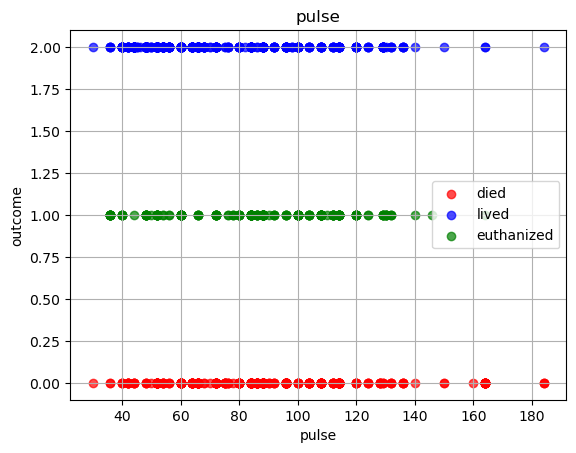

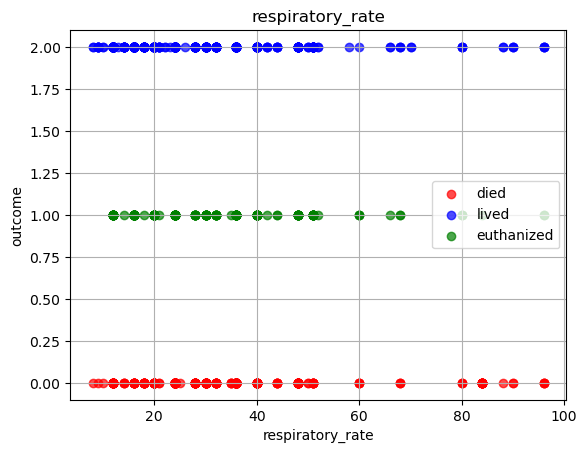

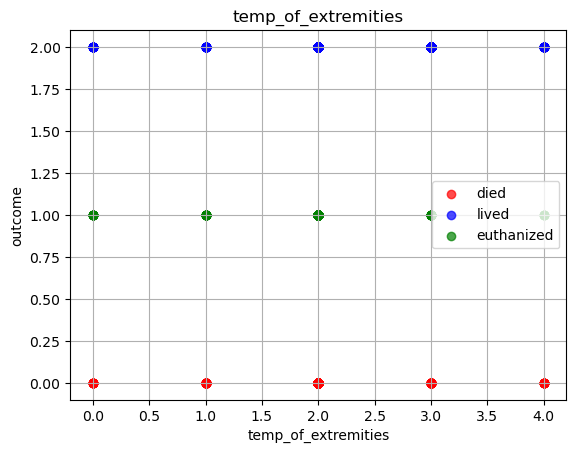

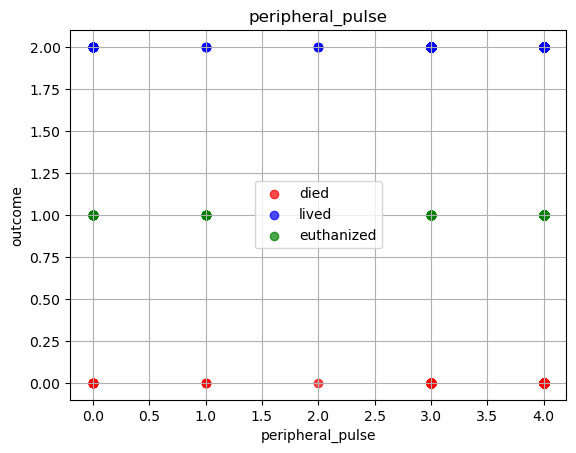

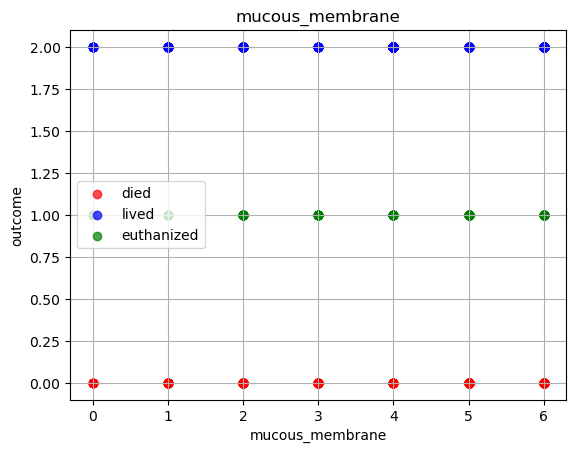

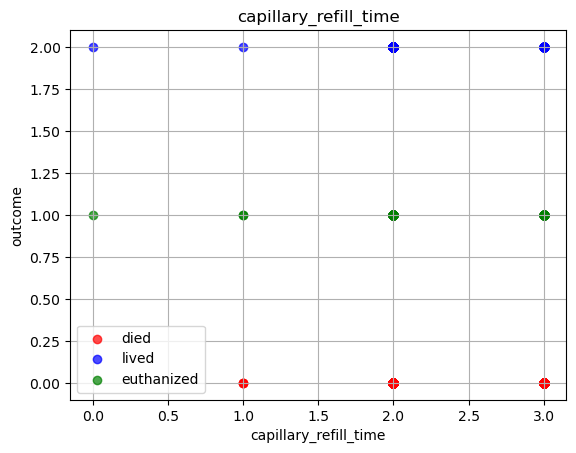

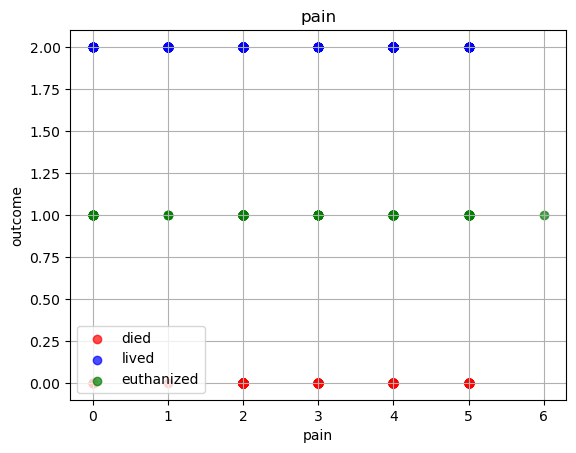

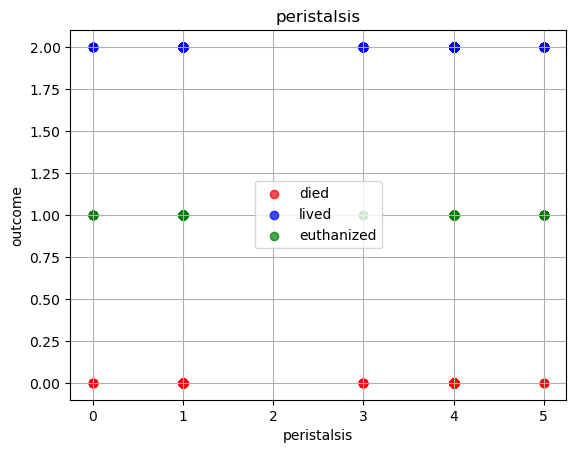

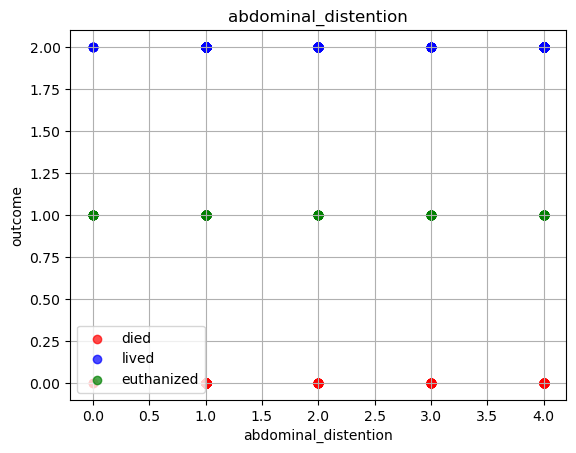

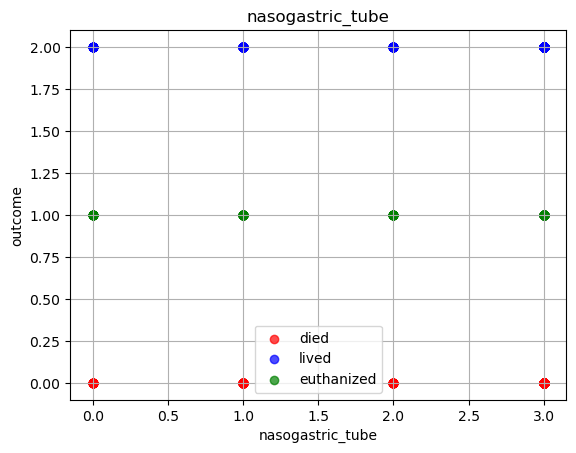

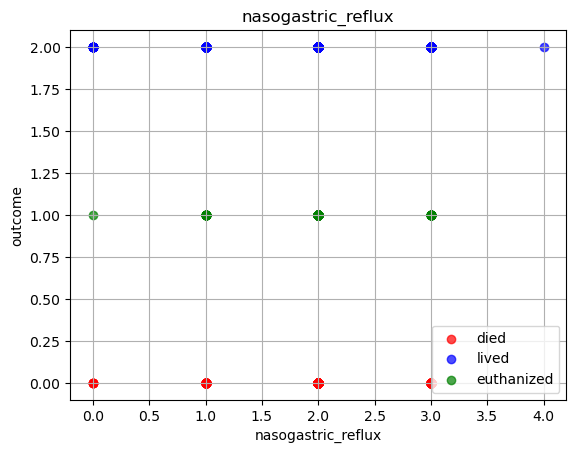

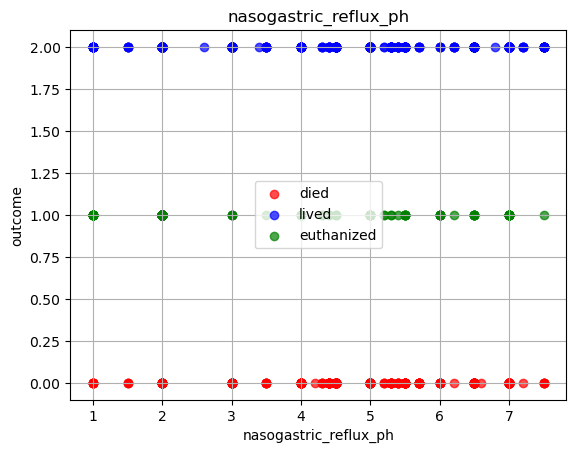

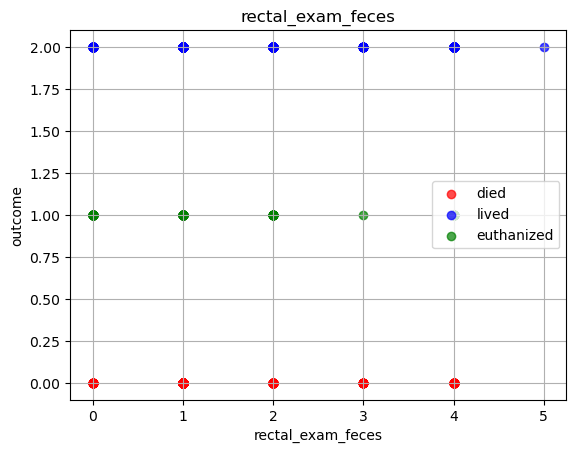

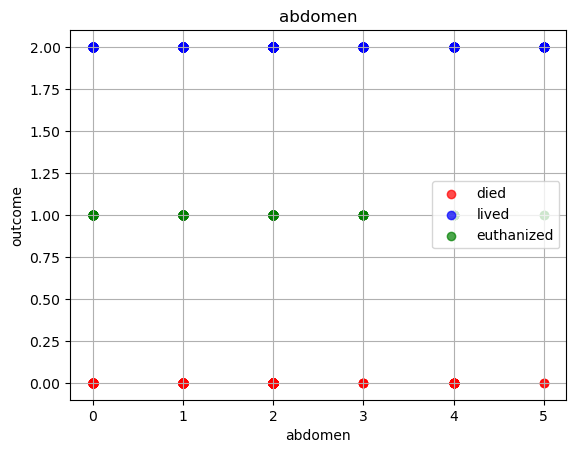

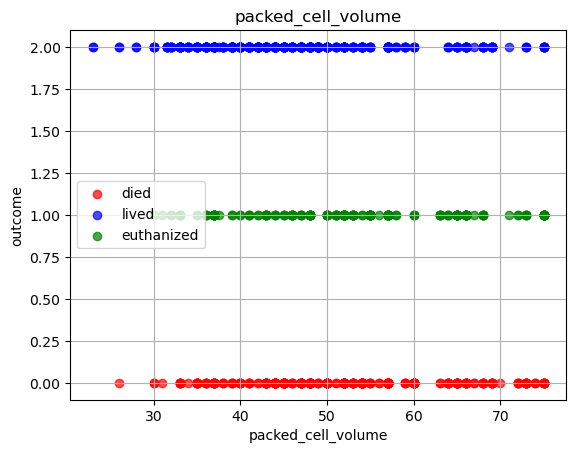

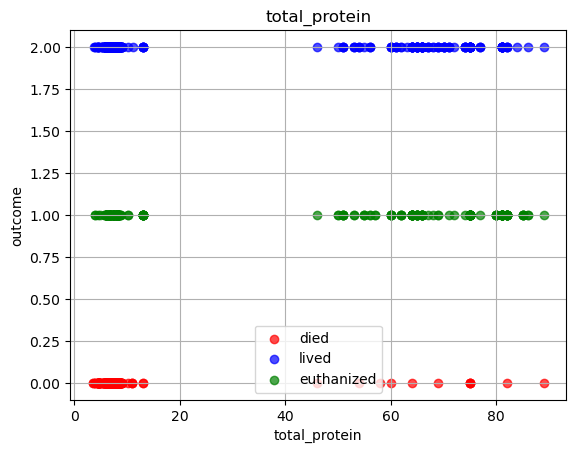

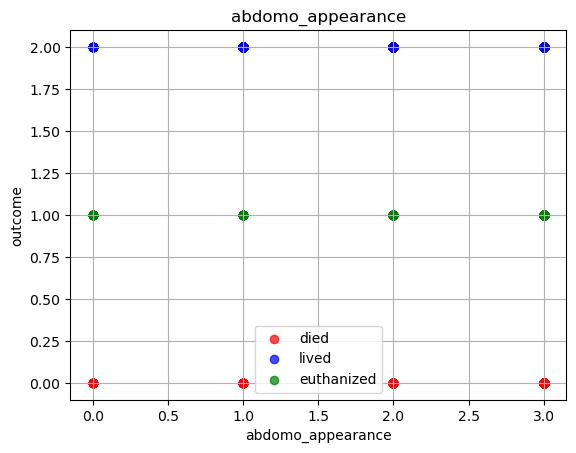

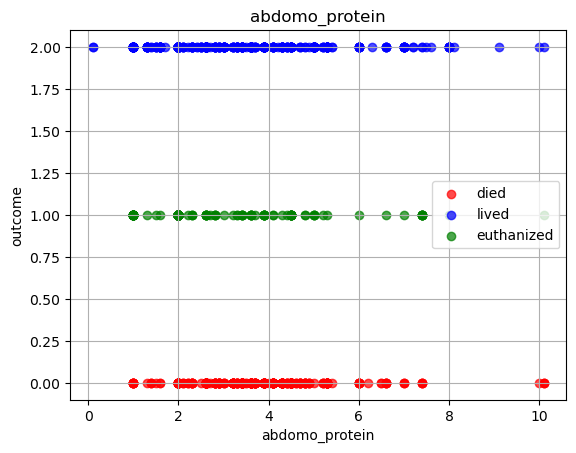

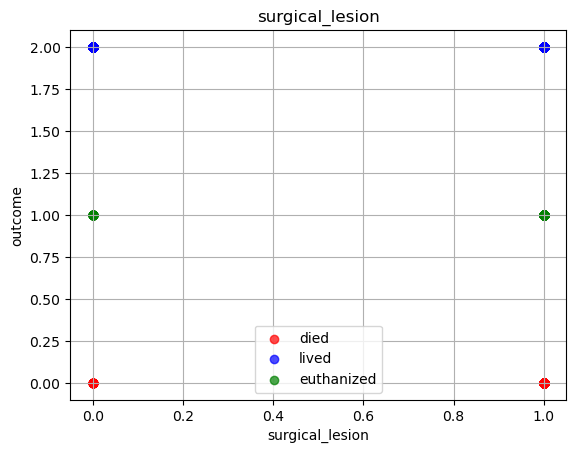

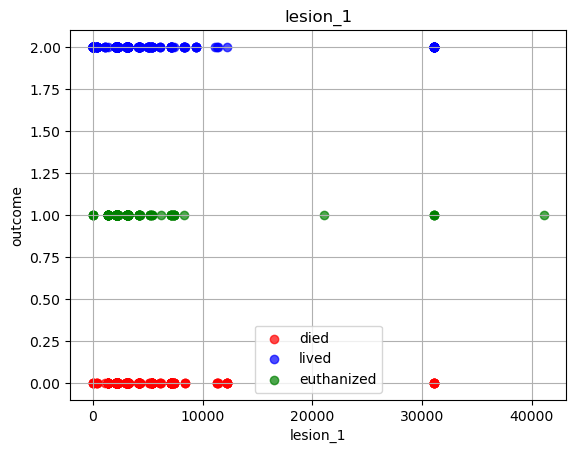

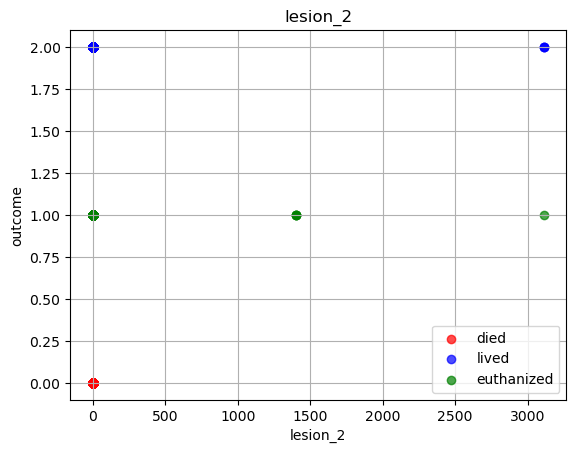

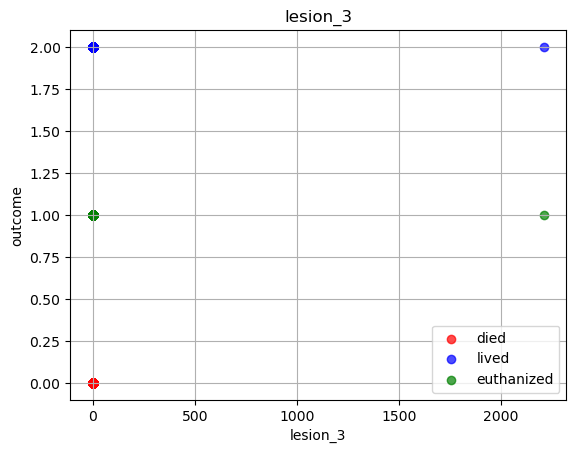

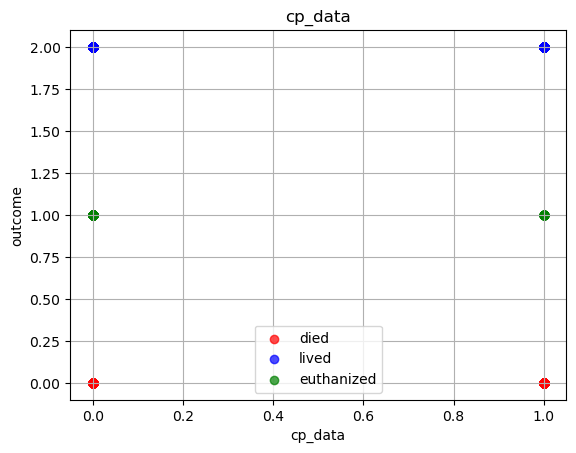

In [115]:
# Plotting scatter training data for relevancy 

def scatter():
    numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
    for column in numerical_columns[:-1]:
        plt.figure()
        plt.scatter(train[train['outcome'] == 0][column], train[train['outcome'] == 0]['outcome'], label=names[0], color='red', alpha=0.7)
        plt.scatter(train[train['outcome'] == 2][column], train[train['outcome'] == 2]['outcome'], label=names[2], color='blue', alpha=0.7)
        plt.scatter(train[train['outcome'] == 1][column], train[train['outcome'] == 1]['outcome'], label=names[1], color='green', alpha=0.7)
        plt.legend()
        plt.title(column)
        plt.ylabel('outcome')
        plt.xlabel(column)
        plt.grid()
        plot_path = f"{_plots}{column}_scatter.jpg"
        plt.savefig(plot_path)
        plt.show()

scatter()

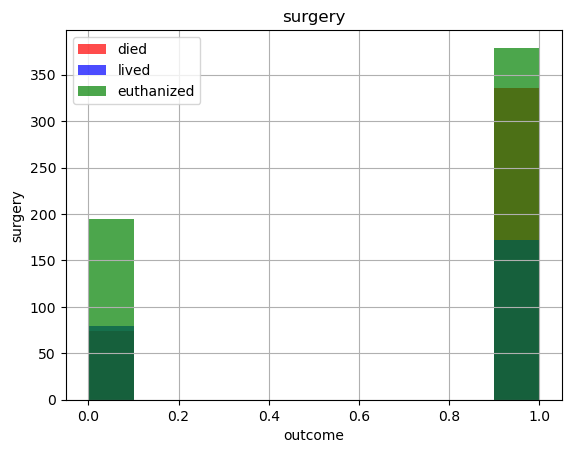

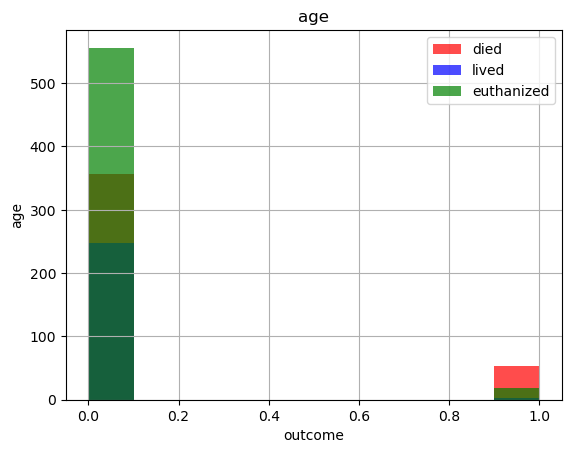

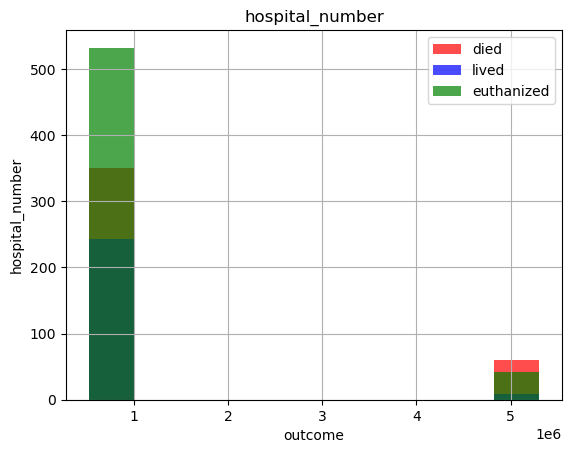

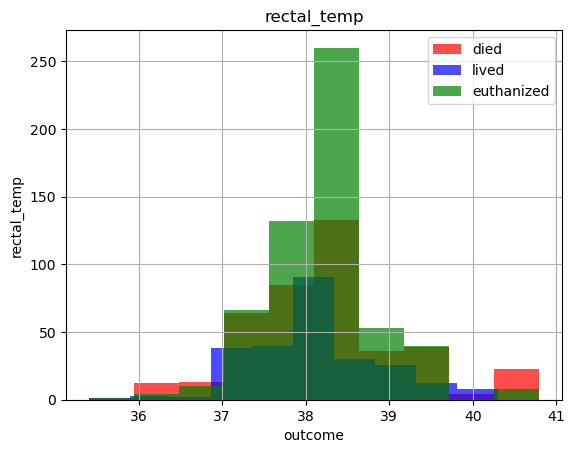

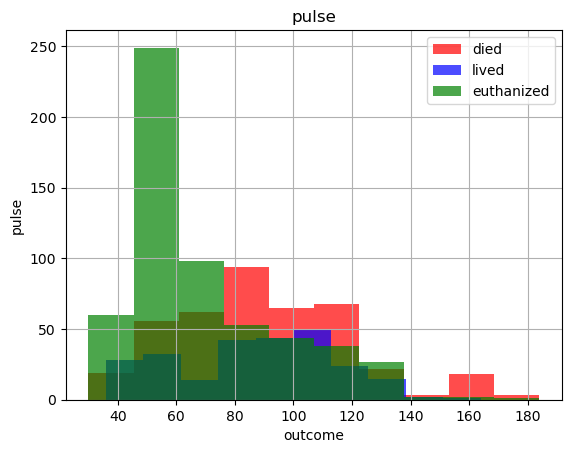

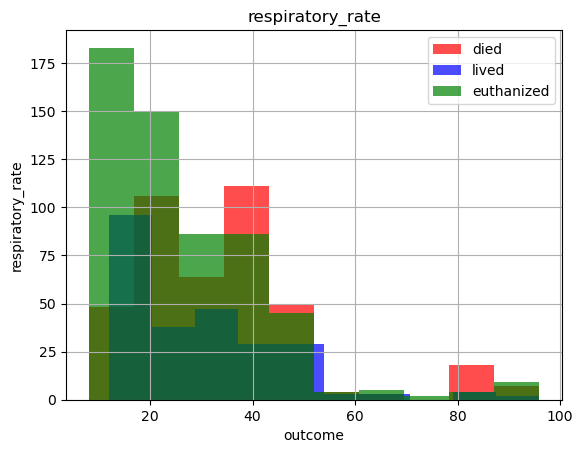

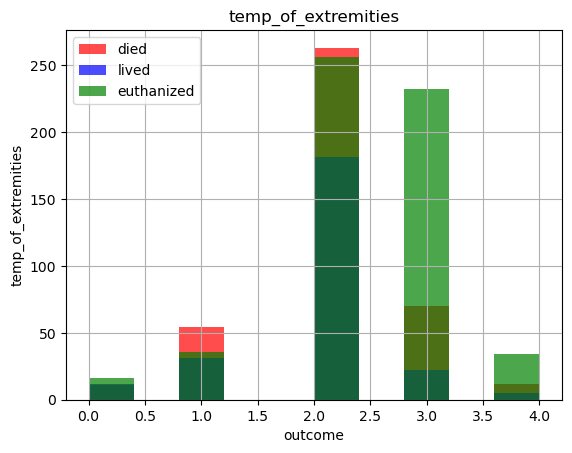

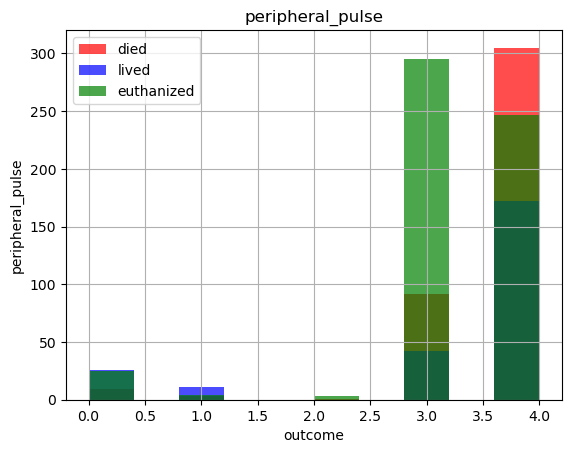

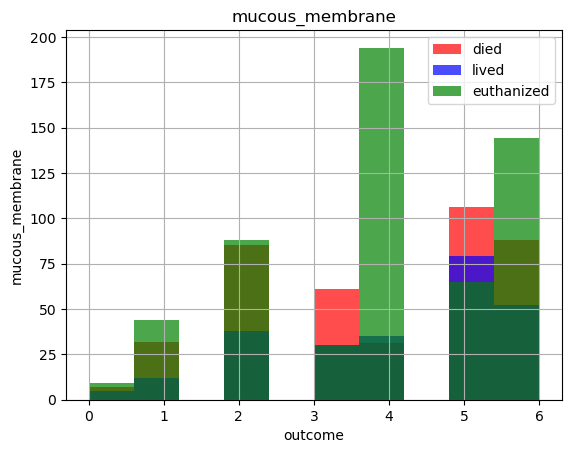

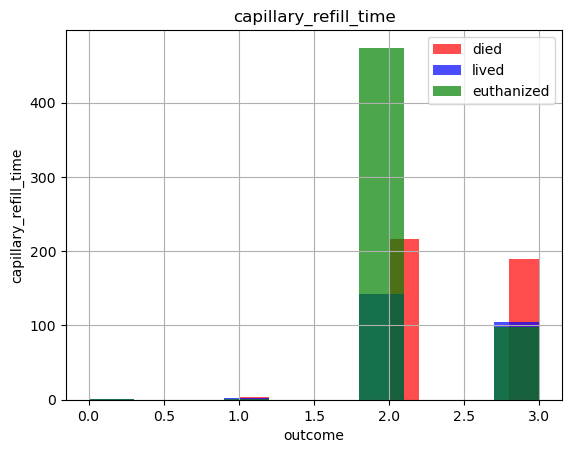

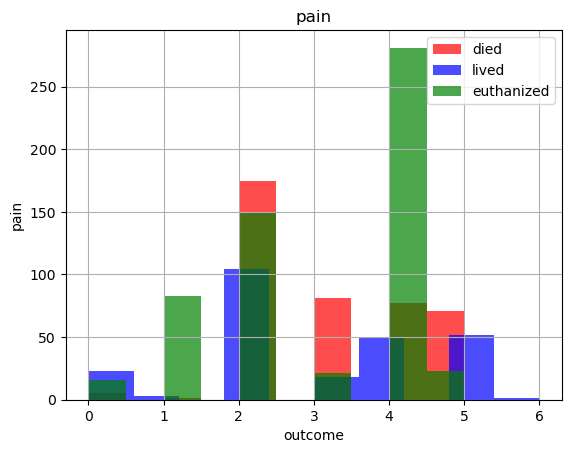

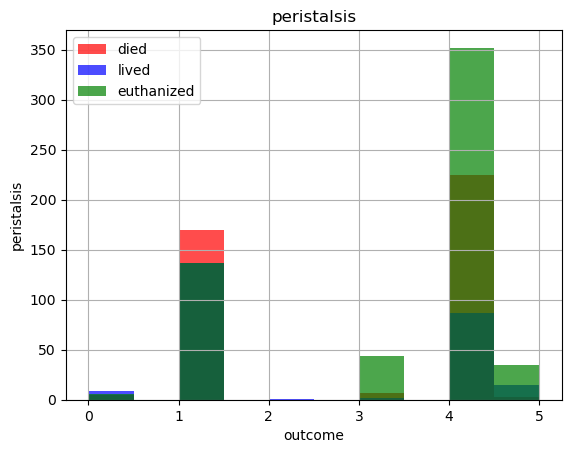

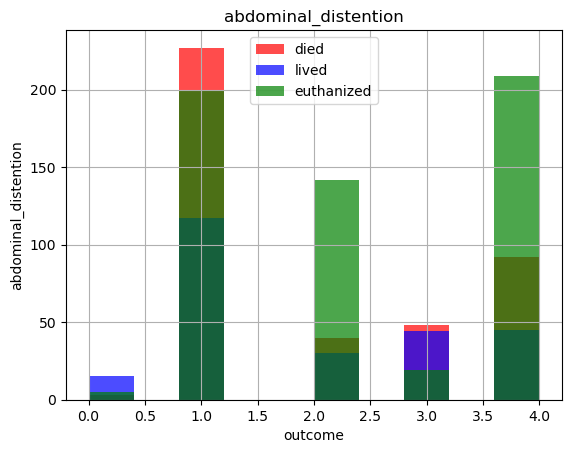

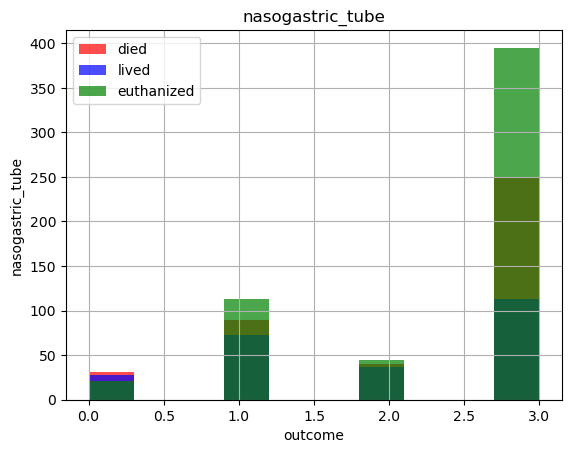

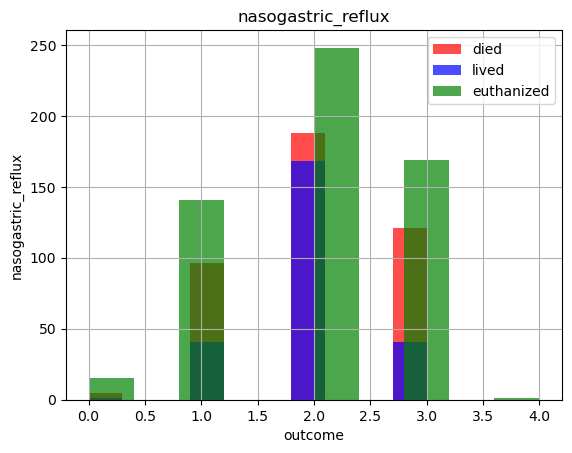

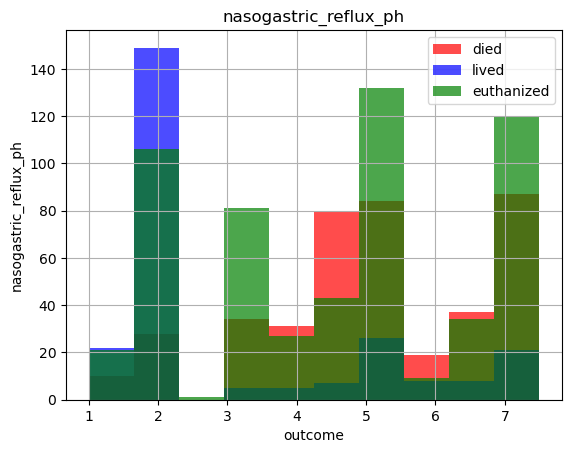

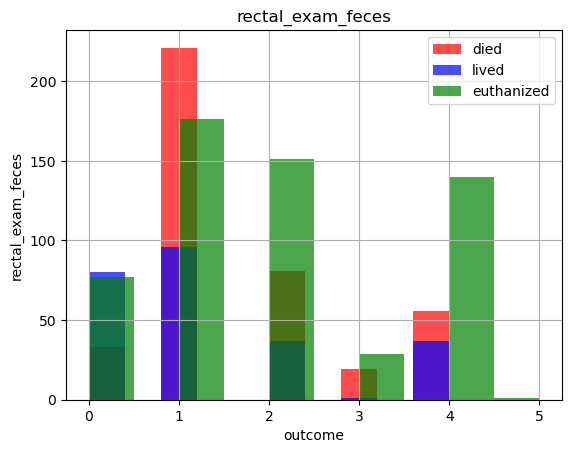

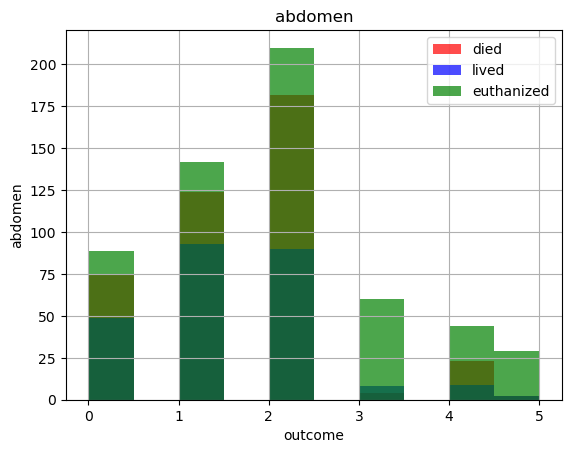

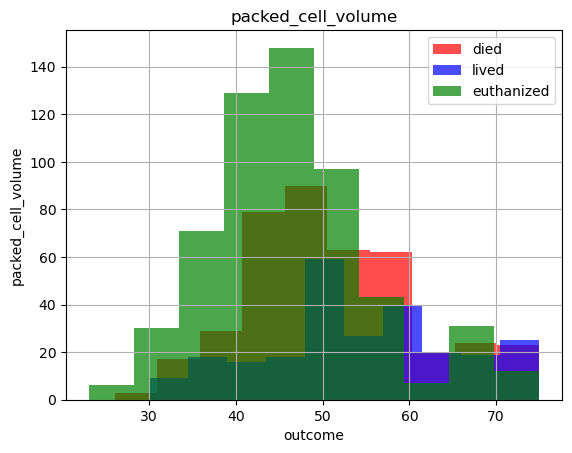

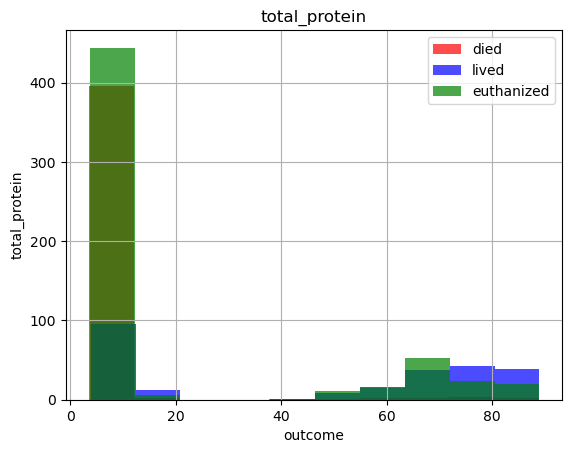

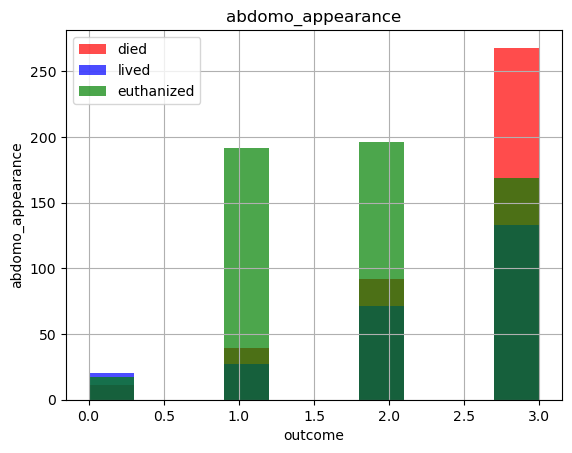

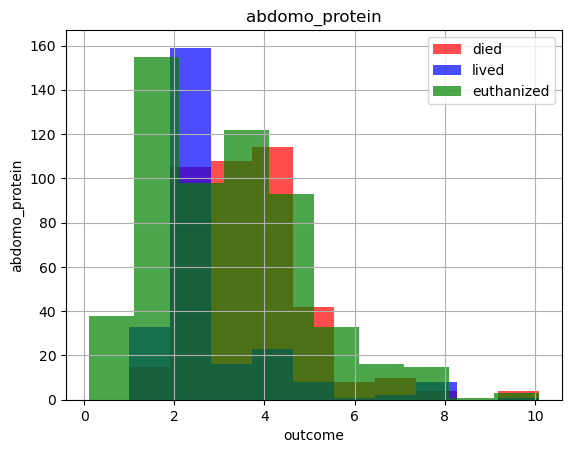

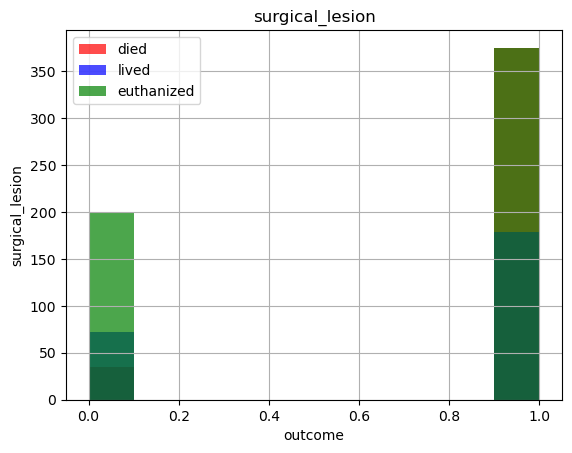

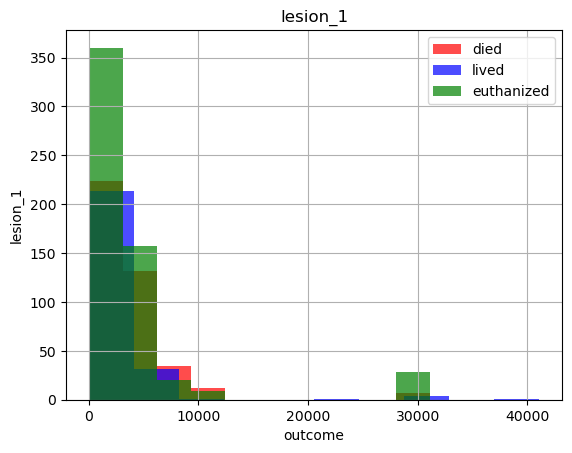

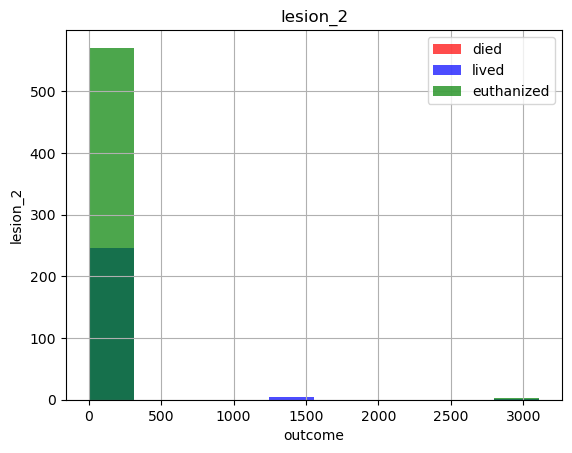

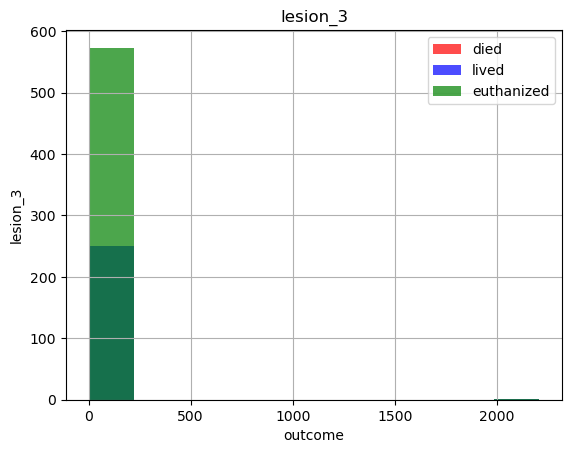

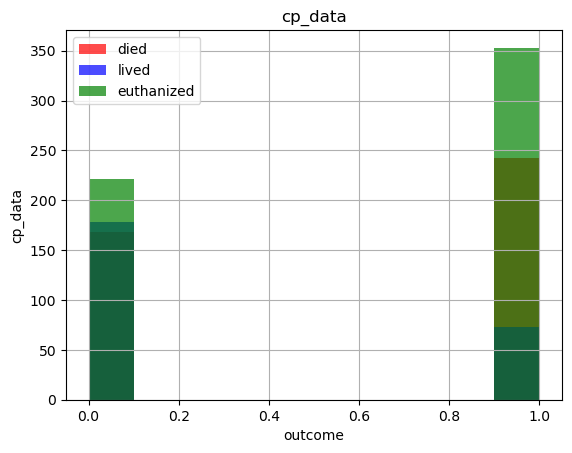

In [116]:
# Plotting histogram training data for relevancy 

def histogram():
    numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
    for column in numerical_columns[:-1]:
        plt.figure()
        plt.hist(train[train['outcome'] == 0][column], label=names[0], color='red', alpha=0.7, density=False)
        plt.hist(train[train['outcome'] == 1][column], label=names[2], color='blue', alpha=0.7, density=False)
        plt.hist(train[train['outcome'] == 2][column], label=names[1], color='green', alpha=0.7, density=False)

        plt.legend()
        plt.title(column)
        plt.ylabel(column)
        plt.xlabel('outcome')
        plt.grid()
        plot_path = f"{_plots}{column}_histogram.jpg"
        plt.savefig(plot_path)  
        plt.show()

histogram()

# K-NearestNeighboor Model 

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.49      0.68      0.57        72
           1       0.64      0.50      0.56        54
           2       0.70      0.61      0.65       121

    accuracy                           0.61       247
   macro avg       0.61      0.60      0.60       247
weighted avg       0.63      0.61      0.61       247



# Gaussian Naive Bayes Model 

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.30      0.97      0.46        72
           1       0.33      0.02      0.04        54
           2       0.55      0.05      0.09       121

    accuracy                           0.31       247
   macro avg       0.39      0.35      0.20       247
weighted avg       0.43      0.31      0.19       247



# Logistic Regression Model

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.51      0.72      0.60        72
           1       0.61      0.43      0.50        54
           2       0.69      0.61      0.65       121

    accuracy                           0.60       247
   macro avg       0.60      0.59      0.58       247
weighted avg       0.62      0.60      0.60       247



# Support Vector Classifier Model

In [123]:
from sklearn.svm import SVC

In [124]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.47      0.11      0.18        72
           1       0.00      0.00      0.00        54
           2       0.49      0.93      0.64       121

    accuracy                           0.49       247
   macro avg       0.32      0.35      0.27       247
weighted avg       0.38      0.49      0.37       247



# Decision Tree Cassifier Model

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        72
           1       0.54      0.57      0.56        54
           2       0.64      0.56      0.60       121

    accuracy                           0.55       247
   macro avg       0.54      0.55      0.54       247
weighted avg       0.56      0.55      0.55       247



# Random Forest Classifier Model

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66        72
           1       0.84      0.67      0.74        54
           2       0.80      0.74      0.77       121

    accuracy                           0.73       247
   macro avg       0.74      0.72      0.72       247
weighted avg       0.75      0.73      0.73       247



# Linear Discriminant Analysis Model

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [130]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        72
           1       0.70      0.56      0.62        54
           2       0.76      0.72      0.74       121

    accuracy                           0.68       247
   macro avg       0.68      0.66      0.66       247
weighted avg       0.69      0.68      0.68       247



# Gradient Boosting Classifier Model

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        72
           1       0.82      0.67      0.73        54
           2       0.77      0.79      0.78       121

    accuracy                           0.74       247
   macro avg       0.74      0.72      0.73       247
weighted avg       0.74      0.74      0.74       247



# Neural Network Classifier Model

In [133]:
from sklearn.neural_network import MLPClassifier

In [134]:
nnc_model = MLPClassifier()
nnc_model.fit(X_train, y_train)
nnc_pred = nnc_model.predict(X_test)
print(classification_report(y_test, nnc_pred))

              precision    recall  f1-score   support

           0       0.44      0.19      0.27        72
           1       0.21      0.81      0.34        54
           2       0.56      0.04      0.08       121

    accuracy                           0.26       247
   macro avg       0.40      0.35      0.23       247
weighted avg       0.45      0.26      0.19       247



# X Gradient Boost Classifier

In [135]:
from xgboost import XGBClassifier

In [136]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.59      0.71      0.65        72
           1       0.81      0.63      0.71        54
           2       0.75      0.74      0.74       121

    accuracy                           0.70       247
   macro avg       0.72      0.69      0.70       247
weighted avg       0.72      0.70      0.71       247



# Cat Boosting Classifier

In [137]:
from catboost import CatBoostClassifier

In [138]:
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
print(classification_report(y_test, cat_pred))

Learning rate set to 0.079078
0:	learn: 1.0636350	total: 3.01ms	remaining: 3s
1:	learn: 1.0334460	total: 5.93ms	remaining: 2.96s
2:	learn: 1.0018827	total: 8.4ms	remaining: 2.79s
3:	learn: 0.9783886	total: 10.5ms	remaining: 2.62s
4:	learn: 0.9577977	total: 14.3ms	remaining: 2.85s
5:	learn: 0.9317513	total: 16.5ms	remaining: 2.73s
6:	learn: 0.9114909	total: 20.3ms	remaining: 2.88s
7:	learn: 0.8949844	total: 22.6ms	remaining: 2.81s
8:	learn: 0.8803534	total: 24.1ms	remaining: 2.66s
9:	learn: 0.8632250	total: 27.2ms	remaining: 2.69s
10:	learn: 0.8494543	total: 29.3ms	remaining: 2.64s
11:	learn: 0.8376338	total: 30.6ms	remaining: 2.52s
12:	learn: 0.8253297	total: 31.6ms	remaining: 2.4s
13:	learn: 0.8144941	total: 34.7ms	remaining: 2.45s
14:	learn: 0.8020729	total: 35.9ms	remaining: 2.36s
15:	learn: 0.7942812	total: 37.2ms	remaining: 2.29s
16:	learn: 0.7857406	total: 38.5ms	remaining: 2.23s
17:	learn: 0.7765685	total: 40.1ms	remaining: 2.19s
18:	learn: 0.7663433	total: 42.5ms	remaining: 2.2

# Check for best metrics

In [73]:
def Statistics():
    print("1. KNeighborsClassifier Score: \t\t\t", accuracy_score(y_test, knn_pred))
    print("2. Gaussian Naive Bayes Score: \t\t\t", accuracy_score(y_test, gnb_pred))
    print("3. Logistic Regressor Score: \t\t\t", accuracy_score(y_test, log_pred))
    print("4. Support Vector Classification Score: \t", accuracy_score(y_test, svc_pred))
    print("5. Decision Tree Score: \t\t\t", accuracy_score(y_test, dtc_pred))
    print("6. Random Forest Score: \t\t\t", accuracy_score(y_test, rfc_pred))
    print("7. Linear Discriminant Analysis Score: \t\t", accuracy_score(y_test, lda_pred))
    print("8. Gradient Boost Classifier Score: \t\t", accuracy_score(y_test, gbc_pred))
    print("9. Neural Network Score: \t\t\t", accuracy_score(y_test, nnc_pred))
    print("10. X Gradient Boost Classifier Score: \t\t", accuracy_score(y_test, xgb_pred))
    print("11. Cat Boost Classifier Score: \t\t", accuracy_score(y_test, cat_pred))

Statistics()

1. KNeighborsClassifier Score: 			 0.7966101694915254
2. Gaussian Naive Bayes Score: 			 0.6440677966101694
3. Logistic Regressor Score: 			 0.6779661016949152
4. Support Vector Classification Score: 	 0.559322033898305
5. Decision Tree Score: 			 0.8305084745762712
6. Random Forest Score: 			 0.9322033898305084
7. Linear Discriminant Analysis Score: 		 0.7796610169491526
8. Gradient Boost Classifier Score: 		 0.8983050847457628
9. Neural Network Score: 			 0.2542372881355932
10. X Gradient Boost Classifier Score: 		 0.8983050847457628
11. Cat Boost Classifier Score: 		 0.9322033898305084


In [77]:
# Save all models locally
def save_models():
    pkl.dump(knn_model, open(f'{_tested}KNearestNeighboor.pkl', 'wb'))
    pkl.dump(gnb_model, open(f'{_tested}GaussianNaiveBaye.pkl', 'wb'))
    pkl.dump(log_model, open(f'{_tested}LogisticRegression.pkl', 'wb'))
    pkl.dump(svc_model, open(f'{_tested}SupportVectorMachine.pkl', 'wb'))
    pkl.dump(dtc_model, open(f'{_tested}DecisionTreeCassifier.pkl', 'wb'))
    pkl.dump(rfc_model, open(f'{_tested}RandomForestClassifier.pkl', 'wb'))
    pkl.dump(lda_model, open(f'{_tested}LinearDiscriminantAnalysis.pkl', 'wb'))
    pkl.dump(gbc_model, open(f'{_tested}GradientBoostingClassifier.pkl', 'wb'))
    pkl.dump(nnc_model, open(f'{_tested}NeuralNetworkClassifier.pkl', 'wb'))
    pkl.dump(xgb_model, open(f'{_tested}XGradientBoostClassifier.pkl', 'wb'))
    pkl.dump(cat_model, open(f'{_tested}CatBoostClassifier.pkl', 'wb'))

save_models()

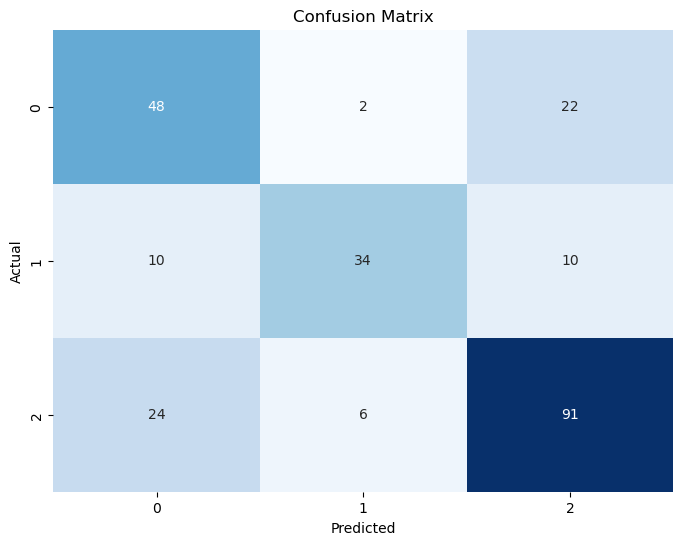

In [139]:
# Print confusion matrix for the best model:

confusion = confusion_matrix(y_test, cat_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform Grid Search Cross Validation

In [140]:
# Set functions to perform text file manipulation

def log_to_file(log_file, text):
    with open(log_file, 'a') as f:
        f.write(text + '\n')

def log_grid_search_results(cv_results, log_file):
    means = cv_results['mean_test_score']
    stds = cv_results['std_test_score']
    params = cv_results['params']
    for mean, std, param in zip(means, stds, params):
        log_to_file(log_file, f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {param}")

In [141]:
# Set grid search cv parameters 

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [142]:
# Reshape the target data
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
# Start the searching for parameters

log_file = f'./model/model.log'
xgb_model = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
log_grid_search_results(grid_search.cv_results_, log_file)

In [ ]:
# Print the best parameters:
grid_search.best_params_

# Pipeline Model & Scaler

In [ ]:
# Create the pipeline

model = ()
pipeline = Pipeline([
    ('scaler', QuantileTransformer()),
    ('model', model)
])

pipeline.fit(X_train, y_train)
y_pipe = pipeline.predict(X_test)
print(classification_report(y_test, y_pipe))
print("Final Score: ", accuracy_score(y_test, y_pipe))

In [ ]:
# Load the info about model in the file

def update_info(full=True):
    info = open(_info, "w")
    pipeline.fit(X_train, y_train)
    y_pipe = pipeline.predict(X_test)
    model_info = [f"Accuracy Score: {accuracy_score(y_test, y_pipe)}\n", 
                  f"Model Name: {pipeline.named_steps['model']}\n", 
                  f"Time:   {dt.datetime.now()}\n\n",
                  f"Report: {classification_report(y_test, y_pipe)}"]
    info.writelines(model_info)
    print(''.join(model_info))
    if full:
        pipeline.fit(X_data, y_data)

In [ ]:
# Load Model In File Project

val = input('Are you sure you want to save the last model: ')
if(val == 'y'):
    update_info(False)
    model = pipeline
    print('Saving . . .')
    pkl.dump(model, open(_model, 'wb'))

# Send Submission

In [ ]:
test = import_data(_test, index_col="id", engine="pyarrow")

test["Policy_Sales_Channel"] = test["Policy_Sales_Channel"].astype(np.int16)
test["Region_Code"] = test["Region_Code"].astype(np.int8)
index = int(pd.read_csv(_submission, nrows=1)['id'][0])
test = pd.get_dummies(test, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

test.rename(columns={
    'Vehicle_Age_< 1 Year': 'Vehicle Age Less than 1 yr',
    'Vehicle_Age_1-2 Year': 'Vehicle Age between 1 and 2 yrs',
    'Vehicle_Age_> 2 Years': 'Vehicle Age greater than 2 yrs'
}, inplace=True)

cat_pred = cat_model.predict(test)
submission = pd.DataFrame({
    'id': range(index, index + len(test)),
    'Response': cat_pred
})
submission.to_csv(_submission, index=False)
submission.head()

In [ ]:
# Final plot of the distribution output

plt.figure(figsize=(10, 6))
sns.countplot(data=submission, x="Response")
plt.grid()
plt.show()

In [144]:
# Display all models

index = 1
for trainers in os.listdir(_tested):
    print(f"{index}. {trainers.replace('.pkl', '')}")
    index += 1


1. KNearestNeighboor
2. GaussianNaiveBaye
3. LogisticRegression
4. SupportVectorMachine
5. DecisionTreeCassifier
6. RandomForestClassifier
7. LinearDiscriminantAnalysis
8. GradientBoostingClassifier
9. NeuralNetworkClassifier
10. XGradientBoostClassifier
11. CatBoostClassifier


In [ ]:
# Load the best model 

try:
    id_model = int(input("Select a model id:"))
    final = all_models[id_model - 1]
    _path = f'{_tested}{final}'
    with open(_path, 'rb') as file:
        model = pkl.load(file)
    print(f'Model {final} loaded finished')
except:
    print("Error loading model . . .")